# Sentiment Analysis on IMDB Movie Reviews

Work individually on this notebook.

Submitted by: Arya Patel 


**Prompt:**

> Describe the IMDB dataset.

Response:

The IMDB dataset is a large dataset of movie reviews for sentiment analysis. It contains 50,000 movie reviews, split evenly into 25,000 reviews for training and 25,000 reviews for testing. Each review is labeled as either positive or negative. The dataset is often used as a benchmark for natural language processing and machine learning tasks.

**Prompt:**

> Write the python code to import the IMDB dataset.

Note that Copilot might not include all the necessry dependent packages. You 
may have to add them manually.

Also, if it's a package you don't have in your environment yet, you can open
the integrated terminal window, make sure to activate the same environment, 
and then install the package.

**Response:**


In [3]:
from keras.datasets import imdb

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2023-10-12 15:05:57.493671: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-12 15:05:57.522779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 15:05:57.579015: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-12 15:05:57.579044: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-12 15:05:57.579074: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

17464789/17464789 [==============================] - 0s 0us/step


You might want to ask some questions about the dataset. For example, you might ask:

> what are the labels for the imdb dataset?

> what is the form of the training data?

> what are the words used in the training data?

For the last prompt, I got example python code, which also duplicated the
dataset loading, so I just deleted the duplicate code.

Note that the dataset is already processed, so the records are lists of integers.

Now let understand the word index a little bit more. Try a prompt like:

> What's a good way to visualize the word index?


One way to visualize the word index is to create a bar chart or histogram of the word frequency, where the x-axis represents the word index and the y-axis represents the frequency. This can help you identify the most common words in the dataset and get a sense of the overall distribution of word frequencies. Another way is to create a scatter plot of the word index and the frequency, where the size of each point represents the frequency of the word. This can help you identify the most frequent words and their corresponding indices.

**Prompt:**

> How do you create a word cloud from the word index, where the font size is proportional to the number of occurences of the word?

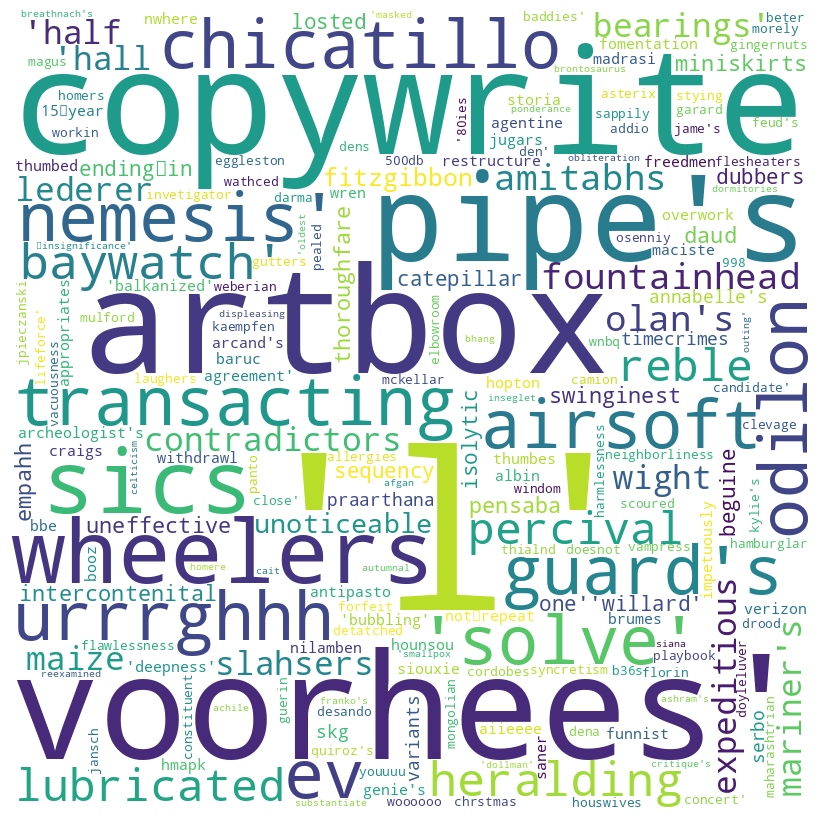

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of word frequencies
word_freq = {word: index for (word, index) in imdb.get_word_index().items()}

# Create a word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

It's clear that the most common words are ones that are not in the word index
(represented by '?') and stop words. So, let's remove those and try again.

> Remove stop words and punctuation

Note that here again, Copilot didn't include the necessary packages, so I had
to add them manually, as well as download the stop words. I just requested that
with the prompt:

> download the stop words

In [13]:
import nltk

nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define a function to remove stop words and punctuation
def remove_stopwords_and_punctuation(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/ds549/aryaxrp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


> now created a word cloud from the filtered words

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/usr4/ds549/aryaxrp/nltk_data'
    - '/projectnb/ds549/students/aryaxrp/ml-549-course/genai/nltk_data'
    - '/projectnb/ds549/students/aryaxrp/ml-549-course/genai/share/nltk_data'
    - '/projectnb/ds549/students/aryaxrp/ml-549-course/genai/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


Ok, so hopefully we understand the dataset enough to know that it is basically
a binary classifier. So, let's prompt to define, train and evaluate a model.

> write a classifer for the imdb dataset

We can inspect the code that was produced, but in addition we can ask Copilot to
expain it for us by putting the cursor in the code cell above and either 
typing "explain", or clicking in the Copilot chat box and typing `/explain`.

> /explain

## Conclusion

We'll leave it there but you may want to explore further, perhaps with prompts
like

> What is the accuracy of the best-performing model on the IMDB dataset?

> What are some common deep learning models used for sentiment analysis on the IMDB dataset?

## Extra Credit

Try to get Copilot to generate a model that achieves > 90% accuracy on the IMDB.